Zadanie 1

Najpierw znajdziemy $C_{\alpha}$, licząc całkę
$$

\int_0^1 C_{\alpha}x^{\alpha}dx = \frac{C_{\alpha}}{\alpha + 1}x^{\alpha + 1}\Big|_{0}^{1} = \frac{C_{\alpha}}{\alpha + 1}

$$

I z własności gęstości, przyrównujemy ją do 1.

$$

\begin{split}
\frac{C_{\alpha}}{\alpha + 1} &= 1 \\
C_{\alpha} &= \alpha + 1
\end{split}

$$

A zatem

$$
p(x) = (\alpha + 1)x^{\alpha}
$$

In [2]:
import numpy as np
def power_law(alpha,n):
    samples = []
    m = alpha + 1
    iterations = 0
    while len(samples) < n:
        iterations += 1
        u1 = np.random.uniform()
        u2 = np.random.uniform(0,m)
        if u2 <= (alpha + 1) * u1**alpha:
            samples.append(u1)
    return samples, n*100/iterations
        
        

    

In [81]:
print(power_law(2, 10)[1])

38.46153846153846


In [86]:
def efficiency(n, num):
    result = []
    for i in range(num):
        result.append(power_law(i, n)[1])
    return result

In [3]:
import matplotlib.pyplot as plt

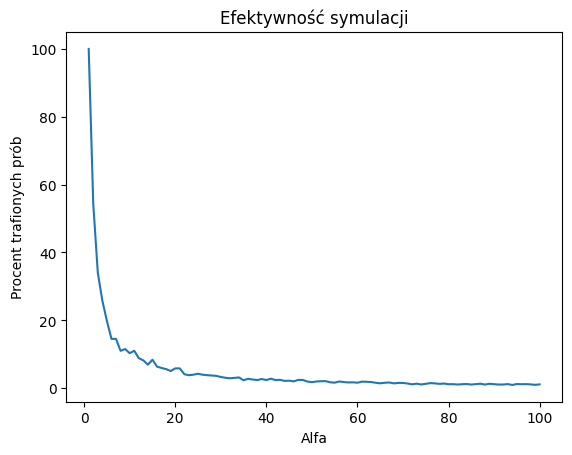

In [87]:

n = 100
num = 100
xs = np.linspace(1,100, 100)
ys = efficiency(n, num)
plt.plot(xs, ys)
plt.ylabel("Procent trafionych prób")
plt.xlabel("Alfa")
plt.title("Efektywność symulacji")
plt.show()

Zadanie 2

Najpierw obliczymy C w funkcji gęstości 
$$
p(x) = C\sin(x)
$$
Z własności gęstości
$$
\int_0^{\frac{\pi}{2}}C \sin(x) dx = -C \cos(x) \Big|_0^{\frac{\pi}{2}} = C = 1
$$

Na początku wygenerujemy zmienną Y o rozkładzie jednostajnym na odcinku $[0, \frac{\pi}{2}]$, która ma gęstość
$$ g(x) = \frac{2}{\pi} $$

A zatem 
$$ 
c = \max_{x \in \mathbb{R}} \frac{f(x)}{g(x)} = \frac{\pi}{2} 
$$

In [26]:
def sin(n):
    c = np.pi/2
    samples = []
    iterations = 1
    while len(samples) < n:
        iterations += 1
        y = np.random.uniform(0, np.pi/2)
        u = np.random.uniform()
        if u <= np.sin(y)/(c * 2/np.pi):
            samples.append(y)
    return samples, n*100/iterations


In [27]:
def efficiency2(n):
    result = []
    for i in range(n):
        result.append(sin(i)[1])
    return result
    

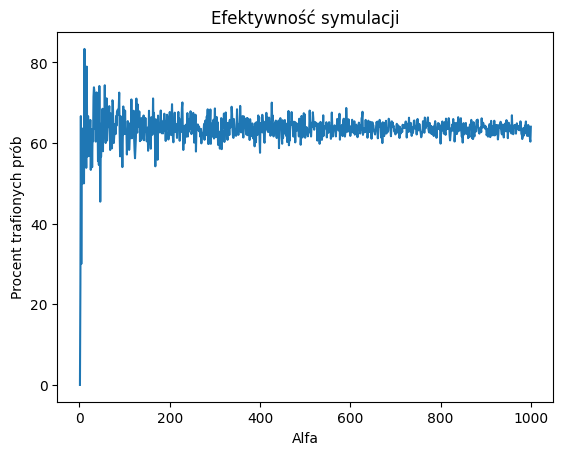

In [38]:
xs2 = np.linspace(1,1000,1000)
ys2 = efficiency2(1000)
plt.plot(xs2, ys2)
plt.ylabel("Procent trafionych prób")
plt.xlabel("Alfa")
plt.title("Efektywność symulacji")
plt.show()

Teraz zaczniemy generowanie od $Y=X^2$. Obliczymy gęstość $Y$
$$ F_Y(t) = P(Y \le t) = P(X^2 \le t) = P(-\sqrt{t} \le X \le \sqrt{t}) = F_X(\sqrt{t})$$
Ponieważ wiemy, że $x \ge 0$.
A zatem gęstośc możemy wyliczyć jako
$$ f_Y(t) = \frac{d}{dt} F_Y(t) = \frac{d}{dt}(F_X(\sqrt{t})) = \frac{1}{2\sqrt{t}}(f_X(\sqrt{t})) = \frac{\sin(\sqrt{t})}{2\sqrt{t}}$$
Dla $t \in (0, \frac{\pi^2}{4})$. Bierzemy $Z$ o rozkładzie jednostajnym na tym zbiorze. Gęstość $Z$ to
$$
g_Z(t) = \frac{4}{\pi^2}
$$
A zatem możemy wyznaczyć
$$ 
c = \max_{x \in \mathbb{R}} \frac{f_Y(x)}{g_Z(x)} = \frac{\pi^2}{8} 
$$
Ponieważ
$$
\lim_{x \to 0} \frac{\sin(\sqrt{x})}{2\sqrt{x}} = \frac{1}{2}
$$

In [13]:
def sin2(n):
    c = (np.pi * np.pi**2)/8
    samples = []
    iterations = 1
    while len(samples) < n:
        iterations += 1
        z = np.random.uniform(0, np.pi**2/4)
        u = np.random.uniform()
        if u <= np.sin(np.sqrt(z))/(c * 2*np.sqrt(z)):
            samples.append(z)
    return np.sqrt(samples), n*100/iterations


In [14]:
def efficiency3(n):
    result = []
    for i in range(n):
        result.append(sin2(i)[1])
    return result

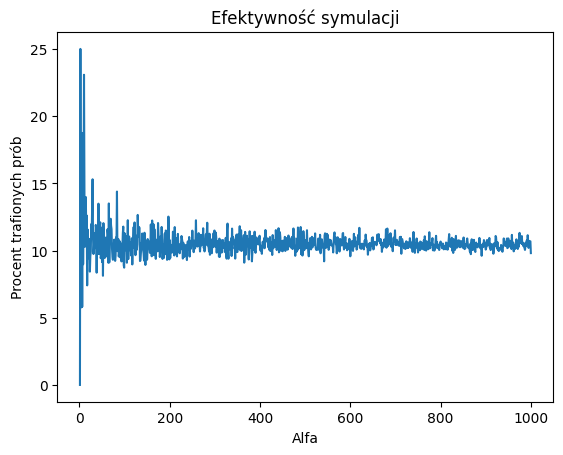

In [20]:
xs3 = np.linspace(1,1000,1000)
ys3 = efficiency3(1000)
plt.plot(xs3, ys3)
plt.ylabel("Procent trafionych prób")
plt.xlabel("Alfa")
plt.title("Efektywność symulacji")
plt.show()

Widzimy że efektywność pierwszej symulacji była znacznie lepsza

Zadanie 3

Rozpoczniemy od wygenerowania $Y$ mający rozkład wykładniczy $Exp(1)$. Gęstość Y to
$$
g(x) = e^{-x}
$$
dla $x \ge 0$. 

Na początku rozważamy $|X|$ o rozkładzie półnormalnym, którego gęstość wynosi $2\cdot\phi(x)$:
$$
f(x) = \frac{\sqrt{2}}{\sqrt{\pi}}e^{\frac{-x^2}{2}}
$$
Później otrzymamy $X$ z $|X|$ generując znak $\pm 1$ z prawdopodobieństwem $\frac{1}{2}$.

Obliczymy c
$$
c =  \max_{x \in \mathbb{R}} \frac{f(x)}{g(x)} = \max_{x \in \mathbb{R}}\frac{\sqrt{2}}{\sqrt{\pi}}e^{(\frac{-x^2}{2} + x)}
$$
Policzmy pochodną wyrażenia $\frac{f(x)}{g(x)}$
$$
\frac{d}{dt}\frac{\sqrt{2}}{\sqrt{\pi}}e^{(\frac{-x^2}{2} + x)} = \frac{\sqrt{2}}{\sqrt{\pi}}(-x + 1)e^{(\frac{-x^2}{2} + x)}
$$
I przyrównując ją do zera otrzymujemy punkt $x =1$. 

Zatem dostajemy 
$$
c = \frac{\sqrt{2}}{\sqrt{\pi}}e^{(\frac{-1}{2} + 1)} = \sqrt{\frac{2e}{\pi}}
$$
I mamy też 
$$
\frac{f(x)}{cg(x)} = e^{\frac{-(x-1)^2}{2}}
$$

$Y$ będziemy mogli wygenerować za pomocą metody odwracania dystrybuanty. Po wygenerowaniu $|X|$, wylosujemy znak $X$. W tym momencie będziemy już mieli rozkład standardowy normalny. By uzyskać rozkład $N(\mu, \sigma)$, będziemy mogli przekształcić $X$, by otrzymać uogólnione $Z = \sigma X + \mu$.

In [33]:
def exp_simulation(num, lambda_):
    sample = np.random.rand(num)
    return (-1)/lambda_ * np.log(1-sample)

In [27]:
def generate_normal(n, sigma, mi):
    samples = []
    iterations = 1
    sigmas = [sigma] * n
    mis = [mi] * n
    while len(samples) < n:
        iterations += 1
        y = exp_simulation(1,1)[0]
        u = np.random.uniform()
        if u <= np.exp(-(y-1)**2/2):
            u2 = np.random.uniform()
            if u2 < 0.5:
                samples.append(y)
            else:
                samples.append(-y)
    return np.add(np.divide(samples,mis), sigmas), n*100/iterations
    

In [39]:
sample = generate_normal(10000, 0, 1)[0]

In [35]:
from scipy.stats import norm

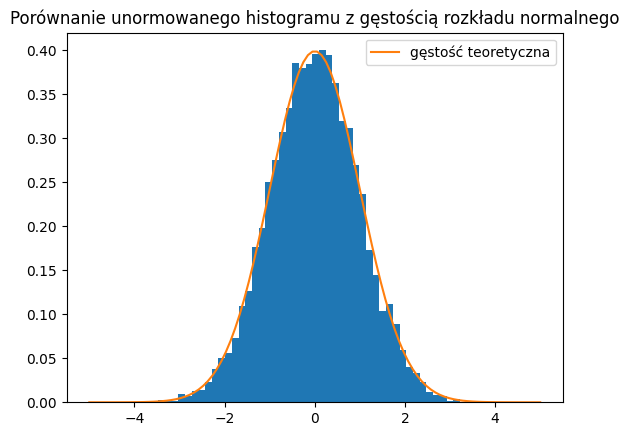

In [63]:
xs = np.linspace(-5,5, 100)
plt.hist(sample, density=True, bins=50)
plt.plot(xs, norm.pdf(xs, 0, 1), label="gęstość teoretyczna")
plt.title("Porównanie unormowanego histogramu z gęstością rozkładu normalnego")
plt.legend(loc='best')
plt.show()

Zadanie 4

In [100]:
def ziggurat(f, g, k,x_0, x_k, n, c):
    xs = np.linspace(x_0, x_k, k)
    samples = []
    f_min = []
    f_max = []
    for i in range(k-1):
        f_min.append(min([f(j) for j in np.linspace(xs[i], xs[i+1], 10**3)]))
        f_max.append(max([f(j) for j in np.linspace(xs[i], xs[i+1], 10**3)]))
    while len(samples) < n:
        u = np.random.uniform()
        x = np.random.uniform(x_0, x_k)
        ind = 0
        for i in range(k-1):
            if xs[i] <= x <= xs[i+1]:
                ind = i
        if u*c*g(x) < f_min[ind]:
            samples.append(x)
        elif u*c*g(x) > f_max[ind]:
            continue
        else:
            if u*c*g(x) < f(x):
                samples.append(x)
    return samples

In [71]:
def exp_cdf(x):
    return np.exp(-x)

In [72]:
def normal_cdf(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

In [114]:
samples = ziggurat(normal_cdf, lambda x: 1 / np.sqrt(2 * np.pi), 100, -4, 4, 10000, 1)

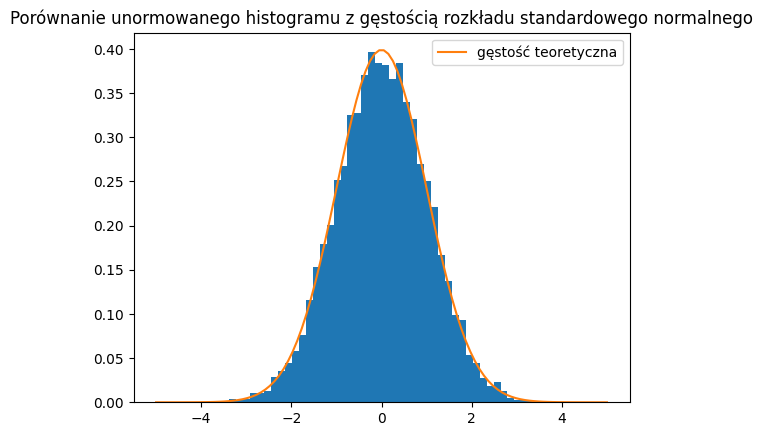

In [116]:
xs = np.linspace(-5,5, 100)
plt.hist(samples, density=True, bins=50)
plt.plot(xs, norm.pdf(xs, 0, 1), label="gęstość teoretyczna")
plt.title("Porównanie unormowanego histogramu z gęstością rozkładu standardowego normalnego")
plt.legend(loc='best')
plt.show()